In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Desafio: 

Explicar o que foi o Titanic 🔥

Meu Entendimento do DataFrame 🔥

Explicar as Colunas 🔥

Analise dos Dados 🔥

Relação dos Dados 🔥

Limpeza de Dados 🔥


# O Trágico Afundamento do Titanic: Um Ícone da História Marítima

O Titanic foi um navio de passageiros de luxo construído no início do século XX que afundou em sua viagem inaugural em abril de 1912 após colidir com um iceberg. O desastre resultou na morte de mais de 1.500 pessoas e se tornou um dos eventos mais famosos da história marítima.

## Entendimento:

De acordo com o entendimento adquirido neste projeto, pretendo analisar diversas medidas, tais como o percentual de mortes com base na idade, classe, sexo e local de embarque dos passageiros do Titanic. O conjunto de dados em questão é extremamente rico, mesmo contendo algumas informações incompletas. Isso possibilita realizar deduções com base no histórico preenchido, como estimar médias de idades e atribuir títulos para identificar o sexo dos passageiros. Para este projeto, espero compreender como essas medidas impactaram na sobrevivência dos passageiros.

# Colunas

survival    =   Survival	0 = No, 1 = Yes

pclass      =    Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	        =   Sex	

Age	        =       Age in years	

sibsp       =   	# of siblings / spouses aboard the Titanic	

parch       =   	# of parents / children aboard the Titanic	

ticket      =	Ticket number	

fare        =	Passenger fare	

cabin       =	Cabin number	

embarked    =	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

#### Carregando o DataFrame

In [13]:
gn = pd.read_csv('data/gender_submission.csv')
df = pd.read_csv('data/train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# Idade por Genero
mean_idade_por_genero = df.groupby('Sex')['Age'].mean()

# Preenchendo as idades faltante com base na media dos Generos embarcados. 
df['Age'] = df.apply(lambda row: mean_idade_por_genero[row['Sex']] if pd.isnull(row['Age']) else row['Age'], axis=1)

In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.shape

(891, 12)

### Percentual de Sobrevivencia por Idade

Conforme esperado, observamos uma taxa de sobrevivência mais alta entre os jovens, representando um terço das estatísticas. Isso nos sugere que uma atenção especial foi dada às crianças. Além disso, podemos deduzir, com base na alta taxa de mortalidade entre os idosos, que a idade foi crucial para a sobrevivência após o naufrágio do navio.

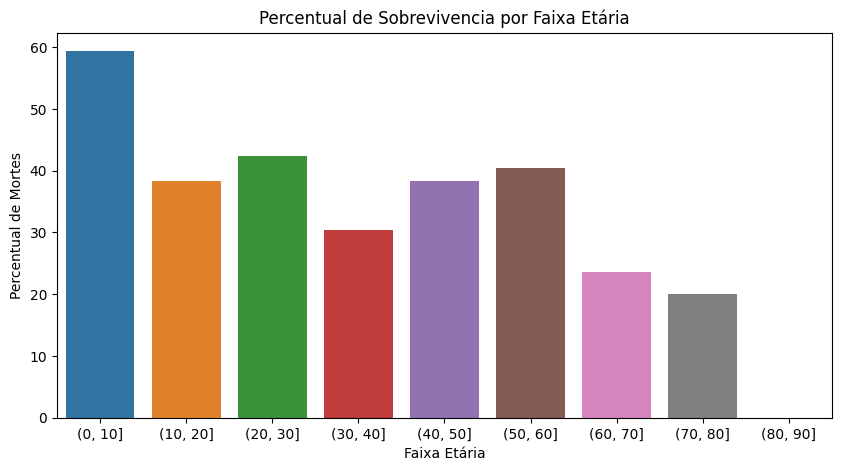

In [17]:
# Agrupando idade e calculando o percentual de Sobrevivencia
age_survival = df.groupby(pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]))['Survived'].mean() * 100

# Gráfico de barras para percentual de mortes por idade
plt.figure(figsize=(10, 5))
sns.barplot(x=age_survival.index, y=age_survival.values)
plt.title('Percentual de Sobrevivencia por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Percentual de Sobrevivencia')
plt.show()

### Percentual de Sobrevivencia por Classe

Com base nos dados apresentados, podemos identificar um padrão em que a classe social, ou seja, o posicionamento das acomodações com maior acesso às saídas, auxiliou em uma alta taxa de sobrevivência para os passageiros mais abastados.

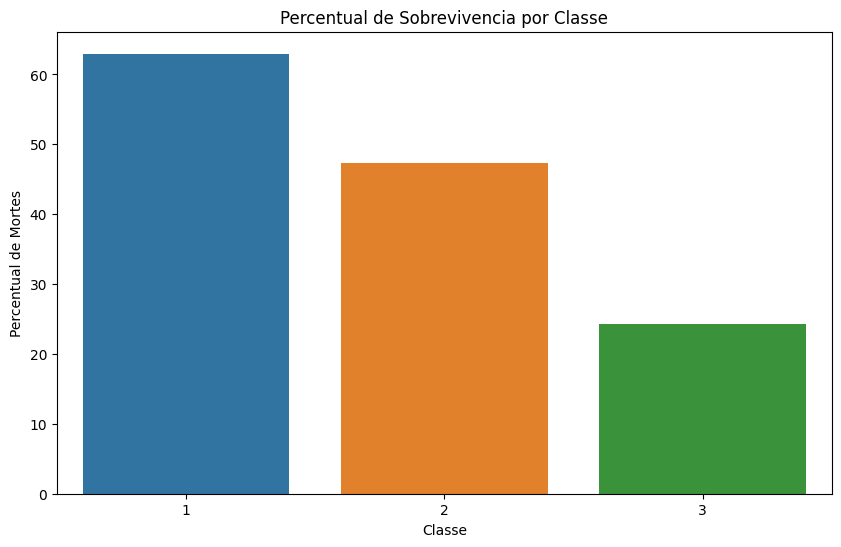

In [20]:
# Agrupando o percentual de sobreviventes por classe
class_survival = df.groupby('Pclass')['Survived'].mean() * 100

plt.figure(figsize=(10,6))
sns.barplot(x=class_survival.index, y=class_survival.values)
plt.title('Percentual de Sobrevivencia por Classe')
plt.xlabel('Classe')
plt.ylabel('Percentual de Sobrevivencia')
plt.show();

### Percentual de Sobreviventes por Genero

Assim como nos casos das idades, a preferência pelas mulheres e crianças foi crucial para o alto nível de sobrevivência das mulheres.

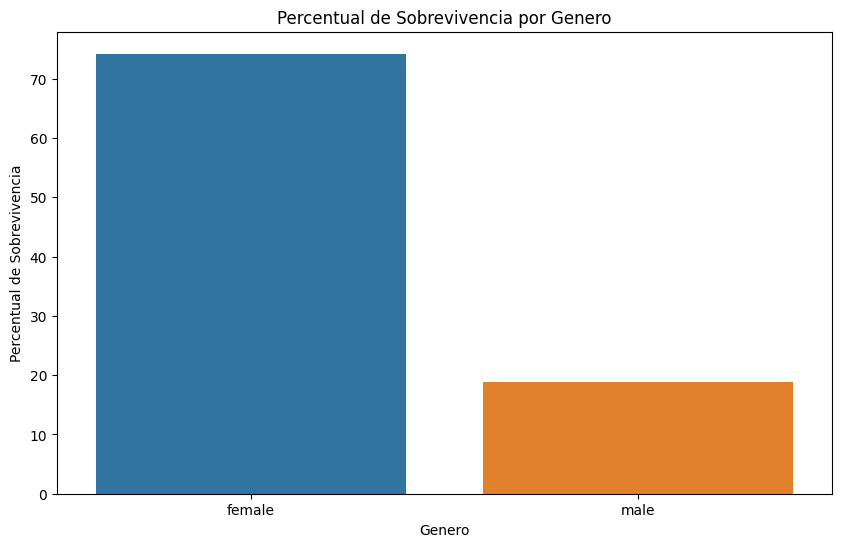

In [7]:
# Agrupando o percentual de Sobrevivencia por Sexo/Genero
gen_survival = df.groupby('Sex')['Survived'].mean() * 100

plt.figure(figsize=(10,6))
sns.barplot(x=gen_survival.index, y=gen_survival.values)
plt.title('Percentual de Sobrevivencia por Genero')
plt.xlabel('Genero')
plt.ylabel('Percentual de Sobrevivencia')
plt.show()

### Percentual de mortes por local de embarque

C = Cherbourg, Q = Queenstown, S = Southampton

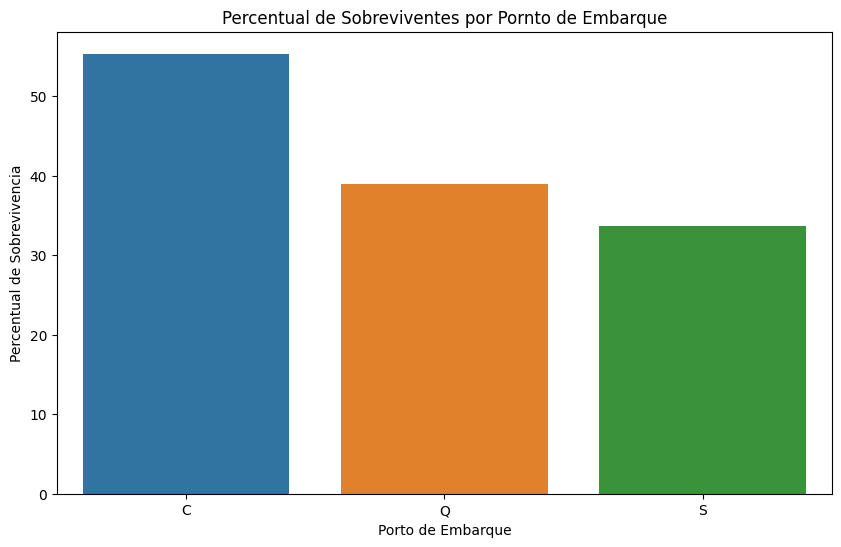

In [8]:
# Agrupando o percentual de Sobrevivencia por Porto de Embarque
embarked_survival = df.groupby('Embarked')['Survived'].mean() * 100

plt.figure(figsize=(10,6))
sns.barplot(x=embarked_survival.index, y=embarked_survival.values)
plt.title('Percentual de Sobreviventes por Pornto de Embarque')
plt.xlabel('Porto de Embarque')
plt.ylabel('Percentual de Sobrevivencia')
plt.show()